In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
label_auth=pd.read_csv(r'/content/drive/MyDrive/LabeledAuthentic-7K.csv', nrows=3067)
label_auth.shape

(3067, 9)

In [4]:
label_fake=pd.read_csv(r'/content/drive/MyDrive/LabeledFake-1K.csv', nrows=995)
label_fake.shape

(995, 10)

In [5]:
label_auth.drop(['source','relation'], axis=1, inplace=True)
label_fake.drop(['source','relation','F-type'], axis=1, inplace=True)
label_auth.shape, label_fake.shape

((3067, 7), (995, 7))

In [6]:
df=pd.concat([label_auth, label_fake], axis=0)
df.shape

(4062, 7)

In [7]:
df.reset_index(inplace=True)
df.tail()

,index,articleID,domain,date,category,headline,content,label
4057,990,995,earki.com,"েম্বর ২৯, ২০১৮",Miscellaneous,যাত্রা শুরু করলো ওসমান’স ব্রাইডাল মেকওভার সেলুন,"এসে গেছে শীতকাল, মানে বিয়ের মৌসুম। এই সময়টিতে ...",0.0
4058,991,996,bengalbeats.com,2019-04-02T20:26:45+00:00,Lifestyle,Zee বাংলা বন্ধের সংবাদ শুনে সীমান্ত এলাকায় টিভ...,হঠাৎ করেই সারাদেশে জি বাংলা বন্ধ হয়ে যাওয়াতে স...,0.0
4059,992,997,earki.com,"্টোবর ২৫, ২০১৮",Miscellaneous,যে ১০টি প্রশ্নের উত্তর সম্পর্কে দেবী সিনেমার র...,মুক্তি পেয়েছে হুমায়ূন আহমেদের ‘দেবী’ উপন্যাস অ...,0.0
4060,993,998,bengalbeats.com,2019-03-11T15:28:37+00:00,Lifestyle,বই পড়ার সময় আমি অন্য কিছু করি না কিন্তু... - B...,“মদ খাওয়ার সময় আমি কোন রিস্ক নেই না” গল্প অবলম...,0.0
4061,994,999,channeldhaka.news,2018-08-08T10:30:56+00:00,Lifestyle,প্রেম করলে বাড়বে ওজন!,ওজন বাড়ার সঙ্গে নাকি প্রেমের এক অদ্ভুত সম্পর্...,0.0


In [8]:
df.drop('index', axis=1, inplace=True)

In [9]:
import numpy as np
df['label']=np.where(df['label']==0.0, 0, 1)
df.tail()

,articleID,domain,date,category,headline,content,label
4057,995,earki.com,"েম্বর ২৯, ২০১৮",Miscellaneous,যাত্রা শুরু করলো ওসমান’স ব্রাইডাল মেকওভার সেলুন,"এসে গেছে শীতকাল, মানে বিয়ের মৌসুম। এই সময়টিতে ...",0
4058,996,bengalbeats.com,2019-04-02T20:26:45+00:00,Lifestyle,Zee বাংলা বন্ধের সংবাদ শুনে সীমান্ত এলাকায় টিভ...,হঠাৎ করেই সারাদেশে জি বাংলা বন্ধ হয়ে যাওয়াতে স...,0
4059,997,earki.com,"্টোবর ২৫, ২০১৮",Miscellaneous,যে ১০টি প্রশ্নের উত্তর সম্পর্কে দেবী সিনেমার র...,মুক্তি পেয়েছে হুমায়ূন আহমেদের ‘দেবী’ উপন্যাস অ...,0
4060,998,bengalbeats.com,2019-03-11T15:28:37+00:00,Lifestyle,বই পড়ার সময় আমি অন্য কিছু করি না কিন্তু... - B...,“মদ খাওয়ার সময় আমি কোন রিস্ক নেই না” গল্প অবলম...,0
4061,999,channeldhaka.news,2018-08-08T10:30:56+00:00,Lifestyle,প্রেম করলে বাড়বে ওজন!,ওজন বাড়ার সঙ্গে নাকি প্রেমের এক অদ্ভুত সম্পর্...,0


In [10]:
df=df.sample(frac=1).reset_index(drop=True)
df.shape

(4062, 7)

In [11]:
df.head()

,articleID,domain,date,category,headline,content,label
0,1208,prothomalo.com,2018-09-20 17:13:58,Sports,নেইমার-এমবাপ্পেদের ধুয়ে দিয়েছেন পাপিন,চ্যাম্পিয়নস লিগের নতুন মৌসুম শুরু হয়েছে। গ্রুপ...,1
1,1390,risingbd.com,2018-09-20 08:15:29,Finance,৫০৮৮ কোটি টাকা ব্যয়ে ২২ ক্রয় প্রস্তাব অনুমোদন,পদ্মার অব্যাহত ভাঙন থেকে নড়িয়া ও জাজিরা উপজেলা...,1
2,1252,ittefaq.com.bd,2018-09-20 10:50:43,International,কারাগার থেকে মুক্ত হলেন নওয়াজ শরিফ,পাকিস্তানে কারাগার থেকে মুক্তি পেয়েছেন ক্ষমতাচ...,1
3,1646,kalerkantho.com,2018-09-20 02:13:37,Education,জুনিয়র শিক্ষার্থীকে জুতা দিয়ে মারল বাকৃবি ছাত্...,জুনিয়রদের কাজকর্ম বিষয়ে সিনিয়র নেতাদের না জানা...,1
4,493,channeldhaka.news,2018-11-25T21:20:14+00:00,Technology,ফেসবুকে সন্তানের ছবি পোস্ট করার আগে আরেকবার ভাবুন,সোশ্যাল মিডিয়াতে বাচ্চাদের ছবি আপলোড করা এখন খ...,0


In [12]:
!pip install bnlp-toolkit

     |████████████████████████████████| 1.2 MB 4.2 MB/s 
     |████████████████████████████████| 23.9 MB 40.8 MB/s 
     |████████████████████████████████| 743 kB 45.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [13]:
import nltk
import re
from bnlp.corpus import stopwords

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [14]:
def preprocess(data):
    """This function is for preprocessing of the news contents. It removes punctuations, English characters and both of Bangla
    and English numerals. It tokenizes all the words and also removes stopwords.
    
    Args: 
        The Entire Dataframe
    Returns:
        Preprocessed news corpuses in a list of lists
    """
    corpus=[]
    for i in range(0, len(data)):
        x=re.sub('[^\u0980-\u09FF]',' ',data['content'][i])
        x=re.sub('[a-zA-Z0-9]+', ' ', x)
        x=re.sub('[০১২৩৪৫৬৭৮৯]+', ' ', x)
        x=x.split()
        x=[w for w in x if w not in set(stopwords)]
        x=' '.join(x)
        corpus.append(x)
    
    return corpus

In [15]:
corpus_eval=preprocess(df)

In [16]:
corpus_eval[5:7]

['পরিবারকে সারপ্রাইজড একা একা গরু কিনতে বোকা বনে আসলেন অভিনেত া আবুল হায়াত বুধবার দুপুরে রাজধানীর আফতাবনগর মধ্যস্থ গরুর হাটে ঘটনাটি ঘটেছে জানিয়ে কোরবানির মোটাতাজা স্বাস্থ্যবান গরু কিনে ঘরে ফেরার পরিকল্পনা ছিলো ভেবেছিলেন একা একা গরু বাসায় পরিবারের সদস্যদের তাক লাগিয়ে দিবেন হাসি ফোটাবেন গৃহিনীর মুখে আশায় গুঁড়ে বালি গরুর হাটে প্রতারকের খপ্পরে সর্বস্ব হারিয়ে প্রতারিত হয়ে ঘরে ফিরতে হয়েছে আবুল হায়াতকে যায় মেন্টু নামে এক গর ু বিক্রেতা ছলে কৌশলে কনভেন্স অন্যলোকের গরু দেখিয়ে টাকা হাতিয়ে নিয়েছে আবুল হায়াত মেন্টু খয়েরি রঙের গরু দেখালো বললো ওজন কেজি দাম পড়বে টাকা বুদ্ধি টাকা কমিয়ে বললাম সেও বোকার মত রাজি হয়ে গেলো সরলমনে টাকা দিলাম জিজ্ঞেস করলো গরুকে খাওয়াবো বললাম অত শত বুঝিনা ভাই একটা ব্যবস্থা দাও মেন্টু বললো দুইমিনিট দাঁড়ান ঘাস আসতেছি মেন্টু দুমিনিটের কথা গেলো দুইঘন্টা পেরিয়ে গেলেও আসার নামগন্ধ ভাবলাম হয়ত ভুলে ভেতরে ঢুকে দড়ি খুলে গরুটিকে সবেমাত্র বের নিলাম আচমকা কয়েকজন মিলে পথ রোধ করলো গরু হাটের ইজারাদারের গেলাম সেও বললো প্রতারিত হয়েছি ঠকে এলাম এসময় আবুল হায়াত আক্ষেপের সূরে একটা বিহিত চাই সরকারের

In [17]:
y=df['label']

In [18]:
import tensorflow as tf
import keras
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model

In [19]:
voc_size=150000
hashing_corpus=[hashing_trick(words, n=voc_size, hash_function='md5', lower=False) for words in corpus_eval]

In [20]:
sent_length=300
embedded_docs=pad_sequences(hashing_corpus, maxlen=sent_length, truncating='post')
print(embedded_docs)

[[ 86175  89073 100346 ...   3176  94984   2685]
 [105200  61562  66030 ... 129278 110103 114037]
 [     0      0      0 ...  24933 101090  22066]
 ...
 [     0      0      0 ... 105222  56960  53842]
 [     0      0      0 ... 101229  56347  56587]
 [     0      0      0 ... 106486 105222  64035]]


In [21]:
len(embedded_docs)

4062

In [22]:
X_final=np.array(embedded_docs)
y_final=np.array(y)
X_final.shape, y_final.shape

((4062, 300), (4062,))

In [23]:
model=load_model(r'/content/drive/MyDrive/hash_cnn_lstm.h5')

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 500)     75000000    ['input_1[0][0]',                
                                                                  'input_1[0][0]',                
                                                                  'input_1[0][0]',                
                                                                  'input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 300, 32)      64032       ['embedding[0][0]']          

In [25]:
model.evaluate(X_final, y_final)

127/127 [==============================] - 41s 229ms/step - loss: 0.1423 - accuracy: 0.9776


[0.1422528624534607, 0.9775972366333008]

In [26]:
prediction=model.predict(X_final)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
accuracy_score(y_final, prediction.round())

0.9775972427375677

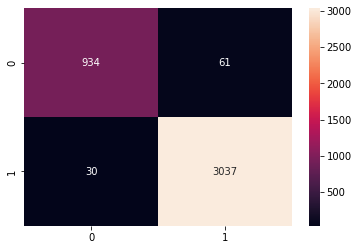

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_final, prediction.round()), annot=True, fmt='g')
plt.show()

In [30]:
print(classification_report(y_final, prediction.round()))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       995
           1       0.98      0.99      0.99      3067

    accuracy                           0.98      4062
   macro avg       0.97      0.96      0.97      4062
weighted avg       0.98      0.98      0.98      4062

